### Sarah Kunzler
#### Assignment 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1

In [2]:
"""
1
Create an array of 100 random numbers uniformly distributed between 0 and 1. Create
a second array of 200 random numbers with Gaussian distribution between 1 and 100.
"""

unif = np.random.rand(100)
print(unif.shape, unif.mean(), unif.std())
mn = 50
std=34
gauss = np.random.normal(loc=50, scale=34, size=200)
print(gauss.shape, gauss.mean(), gauss.std())


(100,) 0.5124664943699236 0.28559853938541635
(200,) 50.75153055502467 35.80989970467527


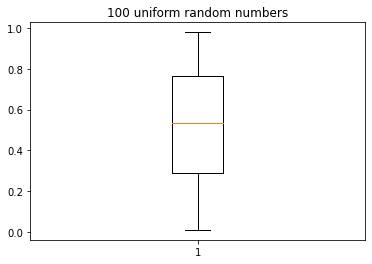

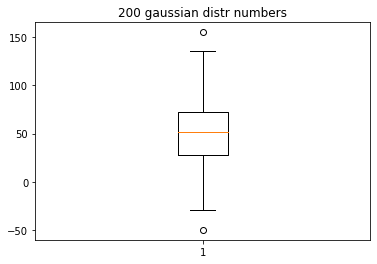

In [62]:
"""
2
Create a box plot for both arrays
"""
plt.boxplot(unif)
plt.title("100 uniform random numbers")
plt.show()

plt.boxplot(gauss)
plt.title("200 gaussian distr numbers")
plt.show()

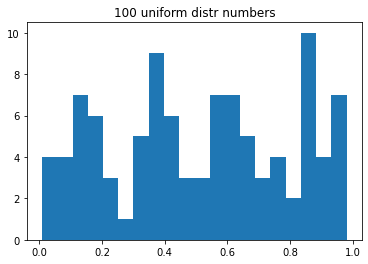

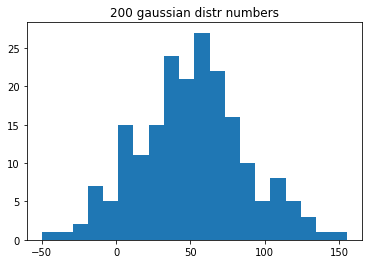

In [63]:
"""
3
Histogram of both arrays using 20 bins
"""

plt.hist(unif, 20)
plt.title("100 uniform distr numbers")
plt.show()

plt.hist(gauss, 20)
plt.title("200 gaussian distr numbers")
plt.show()

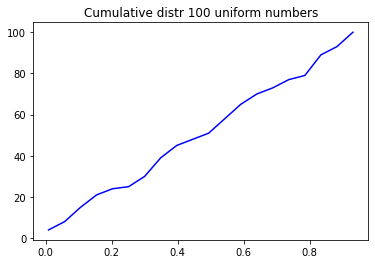

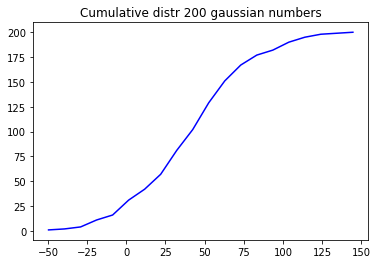

In [64]:
#4
#Write the arrays into a binary file
unif.tofile("unif")
gauss.tofile("gauss")

#read it abck into an array
unif_in = np.fromfile("unif")
gauss_in = np.fromfile("gauss")

#visualize the arrays read in by plotting the cumulative distribution function as a line graph
vals, base = np.histogram(unif, bins=20)
cumulative = np.cumsum(vals)
plt.plot(base[:-1], cumulative, c='blue')
plt.title("Cumulative distr 100 uniform numbers")
plt.show()

vals, base = np.histogram(gauss, bins=20)
cumulative = np.cumsum(vals)
plt.plot(base[:-1], cumulative, c='blue')
plt.title("Cumulative distr 200 gaussian numbers")
plt.show()

(1000, 2)


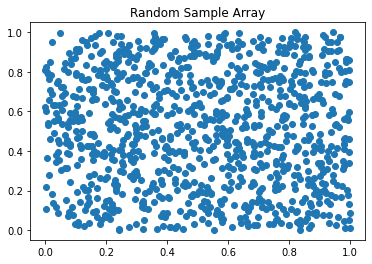

(1000, 2)


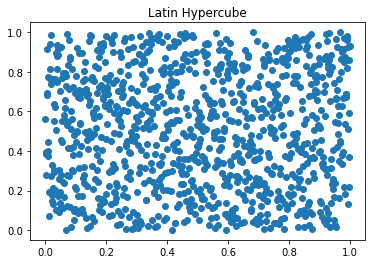

In [6]:
"""
4a
Create 2D arrays using random sampling and Latin hypercube sampling
with 1,000 points on [0,1] x [0,1]. Plot the arrays with a scatter plot and compare.
Note: You can find python packages for LHS such as in scipy.stats.qmc or pyDOE.
"""
from scipy import stats

rsa = np.random.random([1000,2])
print(rsa.shape)
plt.scatter(rsa[:,0],rsa[:,1])
plt.title("Random Sample Array")
plt.show()

#Not totally sure how to make a 2d latin hypercube
sampler = stats.qmc.LatinHypercube(d=2)
lhs = sampler.random(n=1000)
print(lhs.shape)
plt.scatter(lhs[:,0],lhs[:,1])
plt.title("Latin Hypercube")
plt.show()


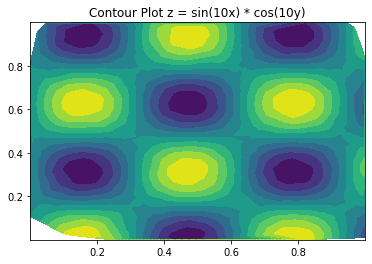

In [66]:
"""
4b)
 Using the random sampling array, assign a z-value according to the function
z = sin(10x) * cos (10y). Plot this new data set as a contour plot with 10 levels.
Hint: Use tricontourf in matplotlib as it is unstructured data.
"""

z = np.sin(10*rsa[:,0]) * np.cos(10*rsa[:,1])
plt.tricontourf(rsa[:,0], rsa[:,1], z, levels=10)
plt.title("Contour Plot z = sin(10x) * cos(10y)")
plt.show()


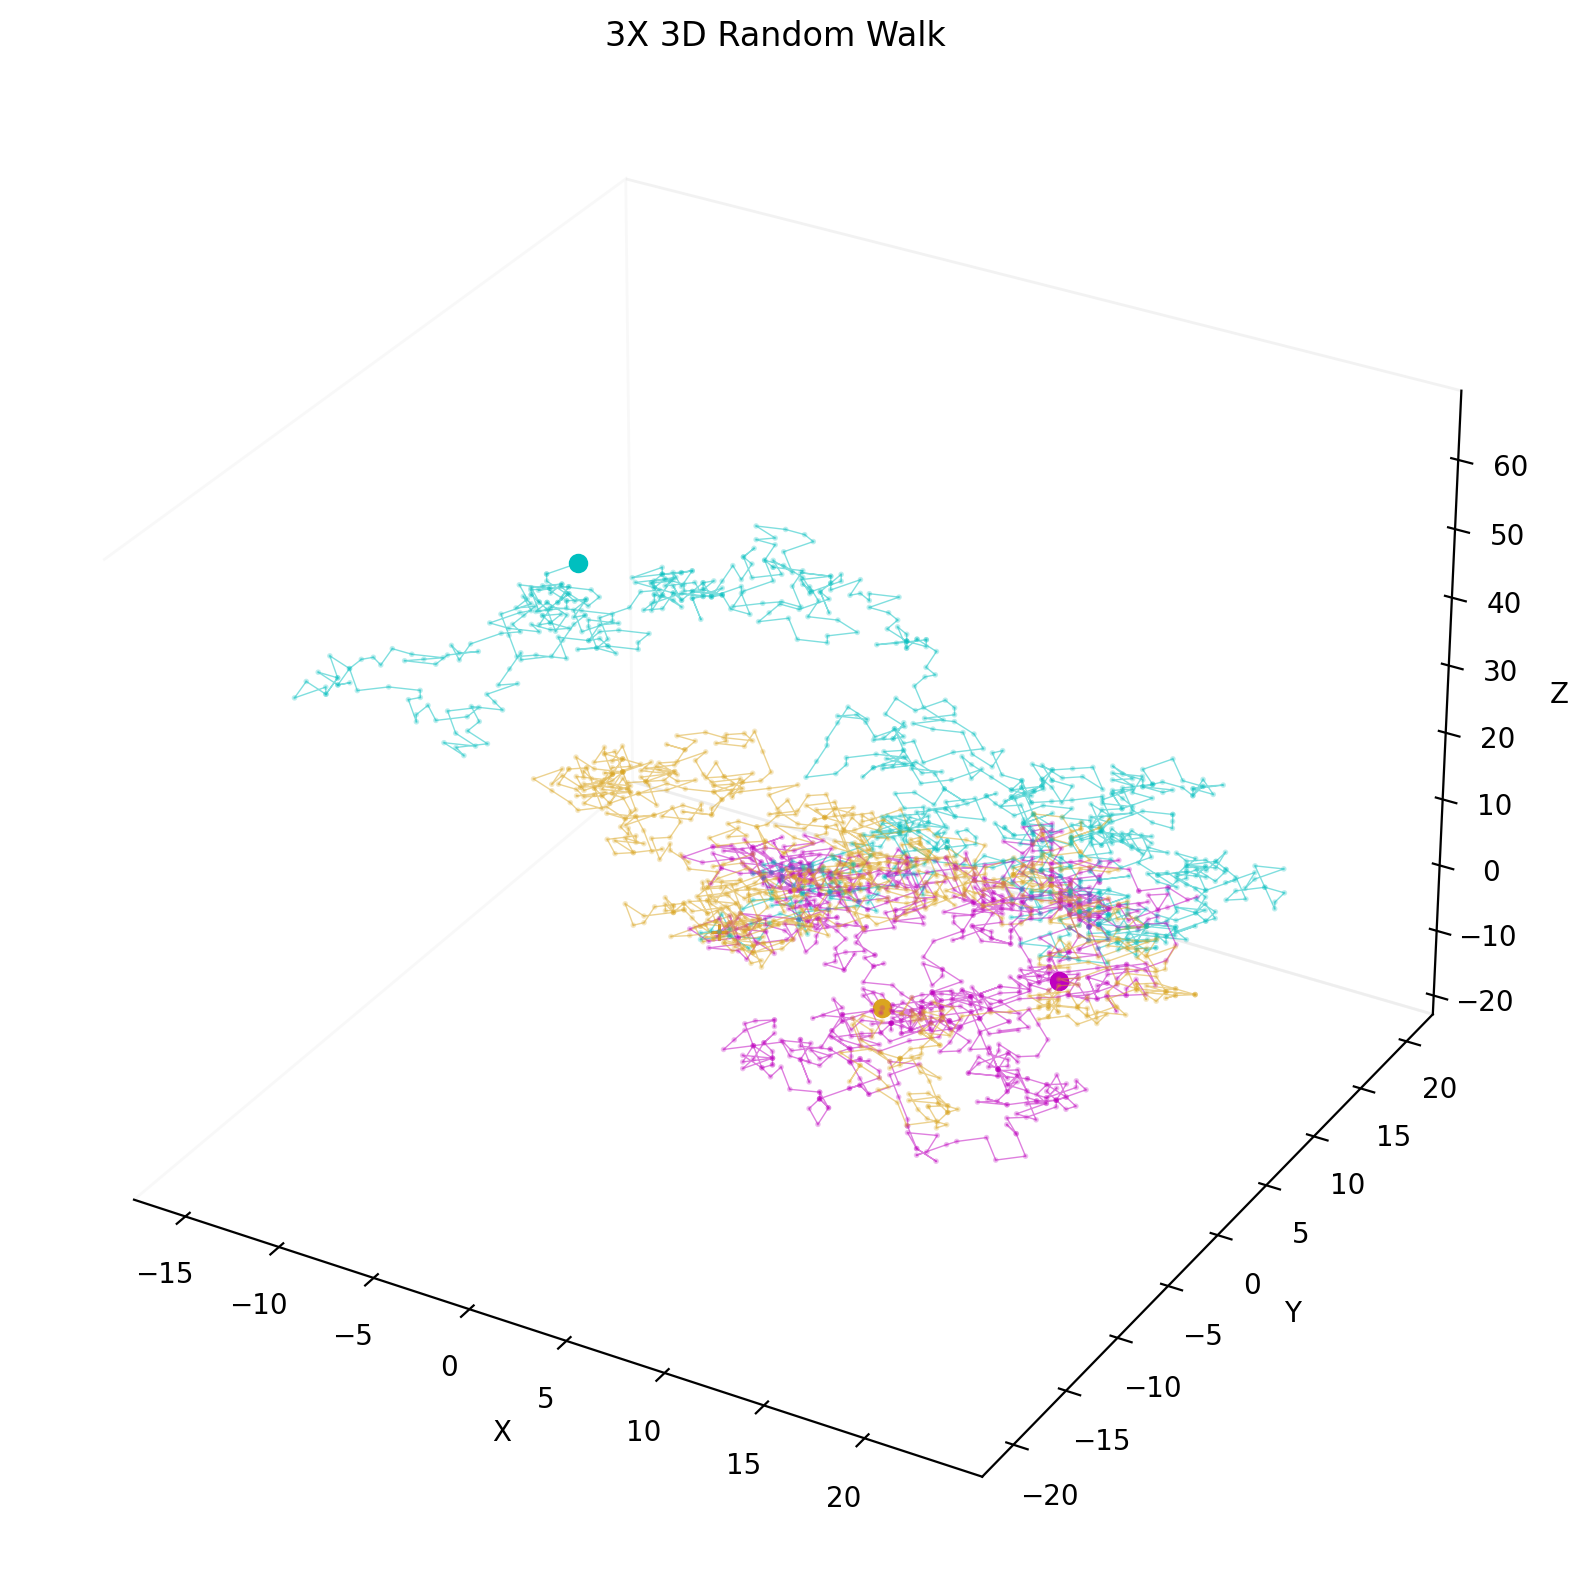

In [8]:
"""
5 
Create three random walk data sets in 3D. Take 1,000 steps in each. Plot all
three on the same plot using lines and a different color for each.
Note: A random walk is a simple simulation in which at each step you randomly
move +1 or -1 in the either the x, y, or z dimension.
"""

def plot3dWalk(path, ax, color):
    # Plot the path
    ax.scatter3D(path[:,0], path[:,1], path[:,2], 
                c=color, alpha=0.25,s=1)
    ax.plot3D(path[:,0], path[:,1], path[:,2], 
            c=color, alpha=0.5, lw=0.5)
    #plot start point
    start = path[:1]
    ax.plot3D(start[:,0], start[:,1], start[:,2], 
              c=color, marker='+')
    #plot end point
    stop = path[-1:]
    ax.plot3D(stop[:,0], stop[:,1], stop[:,2], 
              c=color, marker='o')

poss_steps = [0, 1, -1]
start = np.zeros((1, 3))

colors = ['c', 'm', 'goldenrod']
fig = plt.figure(figsize=(10,10),dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3X 3D Random Walk')

for i in range(3):
    steps = np.random.choice(a=poss_steps, size=(1000, 3))
    rw = np.concatenate([start, steps]).cumsum(0)

    plot3dWalk(rw, ax, colors[i])

plt.show()

## Part 2

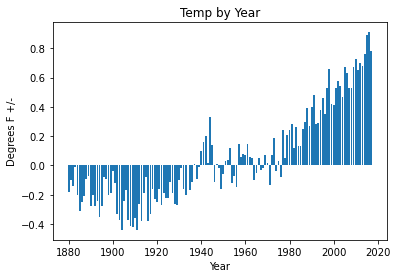

'\nDescribe trends in the data--\n\nFrom 1880 to about 1910 temperatures were cooling each year. The trend started moving upward after that.\nLooks like temperatures have been rising consistently since about 1980.\n'

In [67]:
"""
1
Download the NOAA Land Ocean Temperature Anomalies Data Set:
https://my.eng.utah.edu/~cs6635/NOAA-Temperatures.csv. Create a bar plot of the
data. Include a label called “Year” along the x-axis and a label called Degrees F +/-
From Average along the y-axis. 
"""
import pandas as pd

df = pd.read_csv('NOAA-Temperatures.csv', header=4)

plt.bar(df['Year'], df['Value'])
plt.xlabel("Year")
plt.ylabel("Degrees F +/-")
plt.title("Temp by Year")
plt.show()


"""
Describe trends in the data--

From 1880 to about 1910 temperatures were cooling each year. The trend started moving upward after that.
Looks like temperatures have been rising consistently since about 1980.
"""


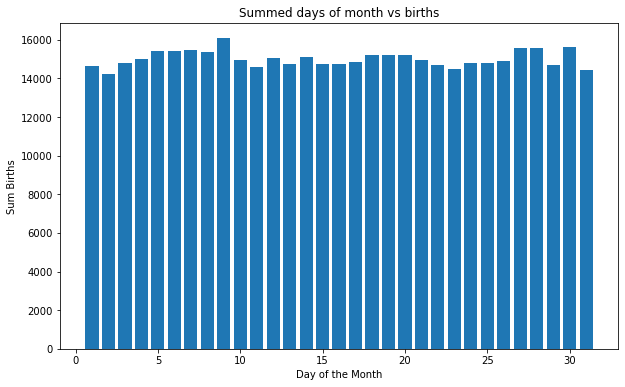

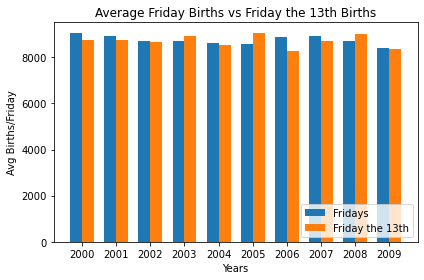

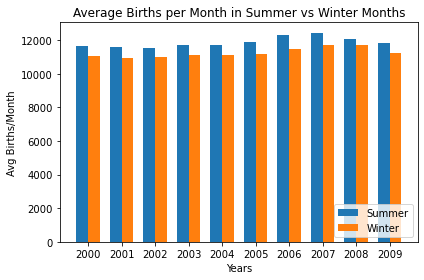

In [61]:
"""
2
Download the U.S. Birth data set: https://git.io/Jt45X.

What day of the month had the highest number of births? 
10th

What day of the month had the lowest number of births?
2nd

Are there any interesting trends in the data, i.e. more births in Summer or Winter? What
about births on Friday the 13th?
Looks like there are consistently fewer births on friday the 13th.
There are also consistently more summer than winter births.

"""
df = pd.read_csv('US_births_2000-2014_SSA.csv')

######### Number of births/ day of the month
plt.figure(figsize=(10,6))
plt.bar(df['date_of_month'], df['births'])
plt.title("Summed days of month vs births")
plt.xlabel("Day of the Month")
plt.ylabel("Sum Births")
plt.show()

########## Friday the 13th births
f13 = df.loc[(df['date_of_month'] == 13) & (df['day_of_week'] == 6)]
f = df.loc[(df['date_of_month'] != 13) & (df['day_of_week'] == 6)]

labels = []
y_f = []
y_f13 = []
for i in range(10):
    yr = i + 2000
    labels.append(str(yr))
    y_f.append(np.mean(f.loc[f['year'] == yr]['births']))
    y_f13.append(np.mean(f13.loc[f13['year'] == yr]['births']))

width = 0.35  # the width of the bars
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_f, width, label='Fridays')
rects2 = ax.bar(x + width/2, y_f13, width, label='Friday the 13th')

ax.set_ylabel('Avg Births/Friday')
ax.set_xlabel('Years')
ax.set_title("Average Friday Births vs Friday the 13th Births")
ax.set_xticks(x, labels)
ax.legend(loc="lower right")
fig.tight_layout()
plt.show()



####### Summer vs Winter births
sum = df.loc[(df['month'] == 6) | (df['month'] == 7) | (df['month'] == 8)]
wint = df.loc[(df['month'] == 12) | (df['month'] == 1) | (df['month'] == 2)]

labels = []
y_s = []
y_w = []
for i in range(10):
    yr = i + 2000
    labels.append(str(yr))
    y_s.append(np.mean(sum.loc[sum['year'] == yr]['births']))
    y_w.append(np.mean(wint.loc[wint['year'] == yr]['births']))

width = 0.35  # the width of the bars
x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_s, width, label='Summer')
rects2 = ax.bar(x + width/2, y_w, width, label='Winter')

ax.set_ylabel('Avg Births/Month')
ax.set_xlabel('Years')
ax.set_title("Average Births per Month in Summer vs Winter Months")
ax.set_xticks(x, labels)
ax.legend(loc="lower right")
fig.tight_layout()
plt.show()


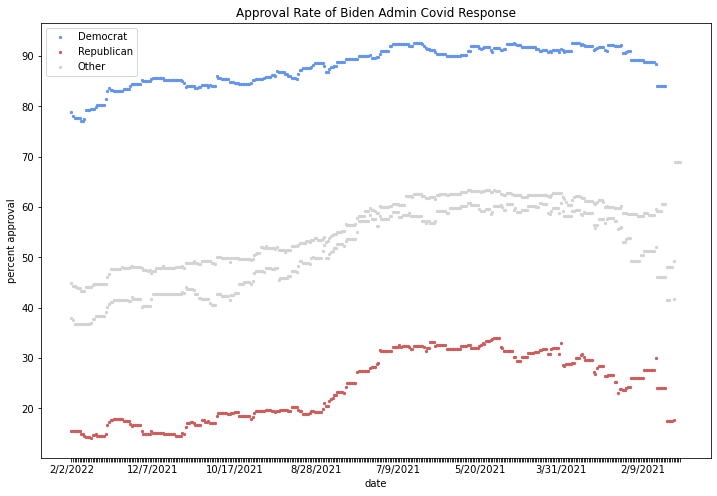

"\nTRENDS: Pretty easy to see that democrats are far more likely to approve the admin's\ncovid response, but all parties overall approval was increasing until about March of 2021 \nwhen this data shows a sudden drop off of approval rates by all parties - just before the\nend of this data.\n"

In [68]:
"""
3 [18 pts] Five Thirty Eight maintains a sever with many interesting datasets:
https://github.com/fivethirtyeight/data. Choose three different data sets to visualize. Visualize each data set using what you think is the most appropriate plot for the given data.
Choose between Radar Chart, Parallel Coordinates, and Scatter Plot for each data
set and use each plotting type only once. It is also helpful to color lines or points according to certain features in the data set to get more insight. Particularly for the Parallel
Coordinates and Scatter Plot. Describe the trends you can find in the data by experimenting with these plots.
"""
######### 1 Approval of Biden admin's handling of Covid over time

df = pd.read_csv('covid-19-polls-master\covid_approval_toplines.csv')
df = df.loc[df['subject'] == 'Biden']

#plt modeldate x approve_estimate for each party
x = df['modeldate']
dem = df.loc[df['party'] == 'D']
rep = df.loc[df['party'] == 'R']
other = yD = df.loc[(df['party'] != 'D') & (df['party'] != 'R')]

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.scatter(dem['modeldate'], dem['approve_estimate'], s=5, c='cornflowerblue', label='Democrat')
ax1.scatter(rep['modeldate'], rep['approve_estimate'], s=5, c='indianred',label='Republican')
ax1.scatter(other['modeldate'], other['approve_estimate'], s=5, c='lightgrey',label='Other')

#show way less x labels
every_nth = 50
for n, label in enumerate(ax1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

plt.title("Approval Rate of Biden Admin Covid Response")
plt.xlabel("date")
plt.ylabel("percent approval")
plt.legend()
plt.show()

"""
TRENDS: Pretty easy to see that democrats are far more likely to approve the admin's
covid response, but all parties overall approval was increasing until about March of 2021 
when this data shows a sudden drop off of approval rates by all parties - just before the
end of this data.
"""

"\nTRENDS: It's a good thing the Jazz have Rudy because no one else holds a candle to his defense score (or total score for that matter).\nActually- looking over all the team's data, Rudy scores highest in defense in the NBA! It's interesting to note that Mitchell has the\nhighest offense score of this group (the Jazz players with positive Raptor scores), but scores the lowest for defense which puts his overall \nscore beneath Conley. Pays to be well rounded! \n"

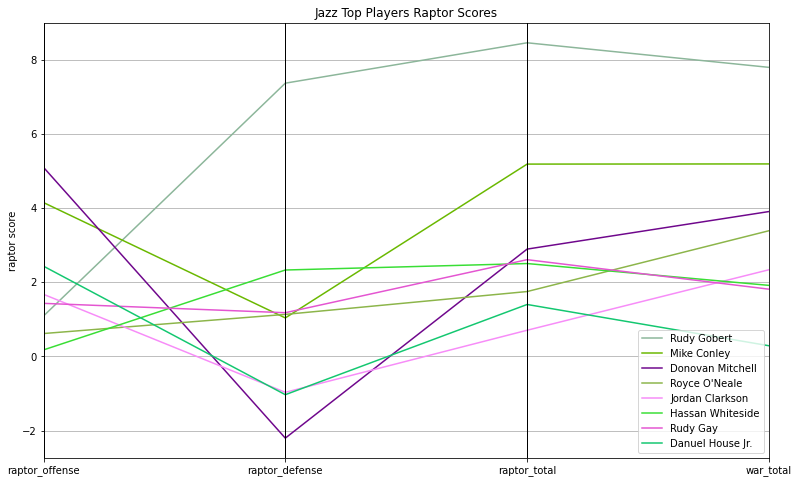

In [69]:
########## 2- NBA Best Players Raptor
df = pd.read_csv('nba-raptor\latest_RAPTOR_by_team.csv')
#filtering by team and best raptor scores
df = df.loc[(df['team'] == 'UTA') & (df['raptor_total'] > 0)]
#Order them by their overall score
df = df.sort_values(by='war_total', ascending=False)

fig = plt.figure(figsize=(13,8)) 
ax1 = fig.add_subplot(111)
data = df.filter(items=['player_name','raptor_offense', 'raptor_defense', 'raptor_total', 'war_total'])
pd.plotting.parallel_coordinates(data, 'player_name')
plt.ylabel("raptor score")
plt.legend(loc="lower right")
plt.title("Jazz Top Players Raptor Scores")

"""
TRENDS: It's a good thing the Jazz have Rudy because no one else holds a candle to his defense score (or total score for that matter).
Actually- looking over all the team's data, Rudy scores highest in defense in the NBA! It's interesting to note that Mitchell has the
highest offense score of this group (the Jazz players with positive Raptor scores), but scores the lowest for defense which puts his overall 
score beneath Conley. Pays to be well rounded! 
"""

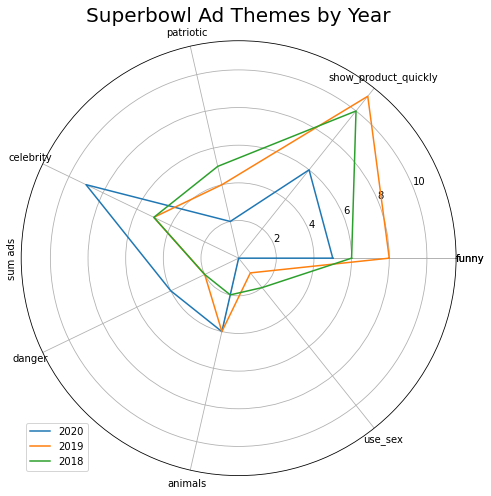

'\nTRENDS: We see that showing the product quickly seems to be a common thing the last two years,\nfunny ads seem to be pretty consistently used. Not many ads relied on sex these last 3 years!\n2020 ads did use more celebrities than the previous two years.\n'

In [71]:
############### 3- Super bowl ads data
df = pd.read_csv('superbowl-ads-main\superbowl-ads.csv')

df2020 = df.loc[df['year'] == 2020]
df2019 = df.loc[df['year'] == 2019]
df2018 = df.loc[df['year'] == 2018]

#sum number of companies that used each category for each year
cols = list(df2020.columns)[4:]
cols.append(cols[0]) #make it a circle
sums2020 = [df2020[col].sum() for col in cols]
sums2019 = [df2019[col].sum() for col in cols]
sums2018 = [df2018[col].sum() for col in cols]

#Create plot
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(sums2020))
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, sums2020, label='2020')
plt.plot(label_loc, sums2019, label='2019')
plt.plot(label_loc, sums2018, label='2018')

plt.title('Superbowl Ad Themes by Year', size=20)
plt.ylabel("sum ads")
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=cols)
plt.legend(loc="lower left")
plt.show()

"""
TRENDS: We see that showing the product quickly seems to be a common thing the last two years,
funny ads seem to be pretty consistently used. Not many ads relied on sex these last 3 years!
2020 ads did use more celebrities than the previous two years.
"""

## Part 3

#### 1. Why is assessing value of visualizations important? What are the two measures for deciding the value of visualizations?
Effectiveness and efficienciency- a visualization needs to do what it's meant to efficiently.

#### 2. Briefly describe a mathematical model for the visualization block shown in Fig. 1.
The data is transformed in some way V (with specification S) into some sort of image (or animation, etc) I. I is percieved by a user, resulting in an increase in knowledge. The user may also interact with and explore E the visualization (adapting the specification) to loop the process. 

#### 3. State four parameters that describe the costs associated with any visualization technique.
Ci: Initial development costs
Cu: Initial costs per user
Cs: Initial costs per session
Ce: Perception and exploration costs

#### 4. What are the pros and cons of interactivity of visualizations?
Cons:
- Allowing user to modify the specification can lead to subjectiveness
- Interaction is costly

Pros:
- Strongly enhances understanding of the data
- Can be used to obtain new insights

## Part 4

(320, 320, 256)


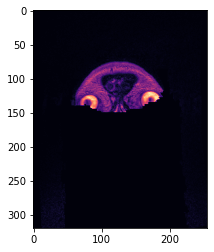

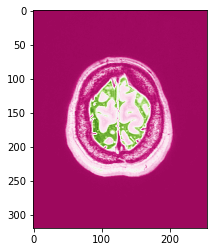

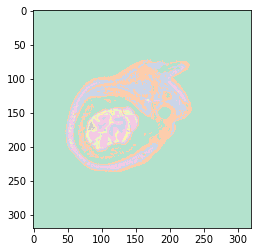

In [25]:
"""
MATLAB/Python also can be used for analysis and visualization of 3D volume data sets, such
as brain MRI images. Download the brain MRI data set from
https://my.eng.utah.edu/~cs6635/T2.nii.gz . The data format is .nii with 320 x 320 x 256
dimensions. Load data in MATLAB/Python. Extract one slice for each axis (three slices total)
from the volume and save them as images. Use at least two colormaps to show the three image set and describe the difference this choice makes
"""
import nibabel as nib

nii = nib.load('T2.nii')
pix = nii.get_fdata()
print(pix.shape)

#sequential colormap- values increase monotonically from purple to yellow,
#showing the gradual change in values
plt.imshow(pix[40,:,:], cmap="magma")
plt.show()

#Diverging colormap- colors increase monotonically until some value, (around 100),
#where the hue shifts and lightness decreases. This really shows the contrast between high and low values
plt.imshow(pix[:,40,:], cmap="PiYG")
plt.show()

#Qualitative colormap- not very helpful. Changes hue in no particular order, just grouping values
#Kinda pretty though
plt.imshow(pix[:,:,40], cmap="Pastel2")
plt.show()